Credit Card Fraud Detection

### __Importing all the required libraries__

In [0]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import os
from imblearn.over_sampling import ADASYN 
from collections import Counter
import seaborn as sn


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import xgboost as xgb


### __Importing dataset__ 

**--->We can see that features are V1, V2,V3 and so on. These features are obtained by doing PCA on the dataset. The dataset we have is already applied with PCA maybe because of sensitive data of the users is present there. 
'Time' and 'Amount' are the features which are not transformed using PCA i.e. they are in their original state.
Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. Feature 'Class' is the target variable with value 1 in case of fraud and 0 otherwise.**

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df = pd.read_csv('creditcard.csv') #'/content/drive/My Drive/Colab Notebooks/Datasets/creditcard.csv'
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### __Checking the information of the dataset i.e. number of columns, number of rows in each column, missing values can be spotted if all the columns don't have same number of records and so on.__

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Checking Null values if any

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Displaying total number of fraud and non fraud transactions which is represented in column "Class" as 0 and 1, where, 0 = Non fraud transactions and 1 = Fraud transactions

In [5]:
print('Normal transactions count: ', df['Class'].value_counts().values[0])
print('Fraudulent transactions count: ', df['Class'].value_counts().values[1])

Normal transactions count:  284315
Fraudulent transactions count:  492


### We will plot histogram to see the distribution of our fraud and non fraud transactions

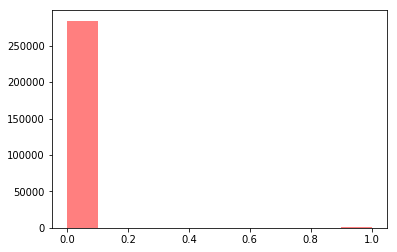

In [9]:
x = df['Class']
num_bins = 10
n, bins, patches = plt.hist(x, num_bins, facecolor='red', alpha=0.5)
plt.show()

__This graph shows that our data is highly imbalanced as we can see that non fraud transactions are in lakhs whereas frauds are just in hundreds. So, we need to balance this data for training our model to make a good model. We will do it by applying over-sampling technique ahead.__

### Dropping the predictor column i.e. "Class" and placing it seperately in y as it is predictor for fraud and non fraud transactions.

In [11]:
X = df.iloc[:, :-1] #Dropping "Class" column using implicit location index of the column

y = df['Class'] # Adding "Class" column to the y variable and storing it there

### Scailing the data to have zero mean and unit variance.

In [14]:
# scale using standard scalar in sklearn package
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

### Splitting the data in train and test to train the model on training data and test its performance on tesr data.

In [15]:
# Partition data into train and test sets by specifying test size and random state
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.30, random_state=95)

__We noticed that Normal transactions count is 284315 and Fraudulent transactions count is 492. This is highly imbalanced data as non fraud transaction data is huge whereas, fraud transaction data is very less for trainind. So,it needs to be balanced to train our model to give better prediction on unseen or test data.__
 

__We will use ADASYN oversampling method, to balance our dataset, from imbalanced-learn package to resample the dataset.__

__ADASYN (ADAptive SYNthetic) is an oversampling technique that adaptively generates minority data samples according to their distributions using K nearest neighbor.__

In [97]:
# Applying the ADASYN over-sampling
ada = ADASYN(random_state=42)
print('Original dataset shape {}'.format(Counter(y_train))) #printing original dataset's fraud and non fraud transactions
X_res, y_res = ada.fit_sample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res))) #printing resampled dataset's fraud and non fraud transactions which are almost equal now

Original dataset shape Counter({0: 199018, 1: 346})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Resampled dataset shape Counter({0: 199018, 1: 199008})


In [16]:
x = y_res
num_bins = 10
n, bins, patches = plt.hist(x, num_bins, facecolor='red', alpha=0.5)
plt.show()

NameError: name 'y_res' is not defined

# Training the models

In [99]:
X_train, y_train = X_res, y_res  # this assigns resampled/balanced dataset to model for training

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(penalty='none', tol=0.0001, C=1, intercept_scaling=1.0) # creating our model with hyperparameters
LGR_Classifier.fit(X_train, y_train);

# Train Random Forest Model
#RDF_Classifier = RandomForestClassifier(random_state=0)
#RDF_Classifier.fit(X_train, y_train);

# Train Bernoulli Naive Baye Model
#BNB_Classifier = BernoulliNB()
#BNB_Classifier.fit(X_train, y_train);

# Train XGBoost Model
XGB_clf = xgb.XGBClassifier(n_estimators=1,learning_rate=0.01,max_depth=1) # creating our model with hyperparameters
XGB_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=1, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# Evaluating trained models on training data.

In [100]:
# Evaluate models
modlist = [('LogisticRegression', LGR_Classifier),('XGBoost',XGB_clf)]  
# List of our models to iterate in the loop for printing results one after other

models = [j for j in modlist] 

print()
print('========================== Model Evaluation Results ========================' "\n")  


# Printing metrics to analyse the performance of the model
for i, v in models:
    scores = cross_val_score(v, X_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(X_train))
    classification = metrics.classification_report(y_train, v.predict(X_train))
    print('==================== {} ==================='.format(i))
    print()
    print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100)) 
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    print("Classification Report:" "\n", classification) 
    print()


========================== Model Evaluation Results ========================

==================== LogisticRegression ===================

Cross Validation Mean Score:  86.2%

Model Accuracy:  87.9%

Confusion Matrix:
 [[181801  17217]
 [ 30906 168102]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88    199018
           1       0.91      0.84      0.87    199008

    accuracy                           0.88    398026
   macro avg       0.88      0.88      0.88    398026
weighted avg       0.88      0.88      0.88    398026


==================== XGBoost ===================

Cross Validation Mean Score:  74.7%

Model Accuracy:  78.2%

Confusion Matrix:
 [[172302  26716]
 [ 59895 139113]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.87      0.80    199018
           1       0.84      0.70      0.76    199008

    accuracy                          

__---> In Logistic Regression model, we can notice that model accuracy on training data is 87.9%. Precision and recall also looks good. f1-score which is calculated using precision and recall is 88% and 87% which is good.__


__--->In XGBoost Classifier model, we can notice that model accuracy on training data is 78.2%. Precision and recall also looks fine. f1-score which is calculated using precision and recall is 80% and 76% which is fine but not that good__

# Testing trained model on test data

In [101]:
# Test models
classdict = {'normal':0, 'fraudulent':1}
print()
print('========================== Model Test Results ========================' "\n")   


# Printing metrics to analyse the performance of the model
for i, v in models:
    accuracy = metrics.accuracy_score(y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))
    classification = metrics.classification_report(y_test, v.predict(X_test))   
    print('==================== {} ==================='.format(i))
    print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print() 
    print("Classification Report:" "\n", classification) 
    print() 


========================== Model Test Results ========================

==================== LogisticRegression ===================
Model Accuracy:  91.5%

Confusion Matrix:
 [[78003  7294]
 [    5   141]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.96     85297
           1       0.02      0.97      0.04       146

    accuracy                           0.91     85443
   macro avg       0.51      0.94      0.50     85443
weighted avg       1.00      0.91      0.95     85443


==================== XGBoost ===================
Model Accuracy:  86.4%

Confusion Matrix:
 [[73692 11605]
 [    9   137]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.93     85297
           1       0.01      0.94      0.02       146

    accuracy                           0.86     85443
   macro avg       0.51      0.90      0.48     85443
weighted avg       1

__--->In Logistic Regression model, we can notice that model accuracy on test data is 91.5%. Precision and recall also looks good. f1-score which is calculated using precision and recall is low for fraud transactions as test data is not resampled or balanced data.__

__Model is performing good in predicting as it has 91.5% accuracy along with other metrics which are showing good results.__

__--->In XGBoost Classifier model, we can notice that model accuracy on test data is 86.4%. Precision and recall also looks good. f1-score which is calculated using precision and recall is low for fraud transactions as test data is not resampled or balanced data.__

__Model is performing good in predicting as it has 86.4% accuracy along with other metrics which are showing good results.__

# HyperParameter Tuning using GridSearchCV for XGBoost Classifier algorithm

In [104]:
#grid search for XGBoost

# input hyperparameters for tuning
param_distXGB = {
    "n_estimators" : [5,10,20], 
    "max_depth" : [5,10],
    "learning_rate":[0.01] 
}


#importing GridSearchCV and setting parameters
from sklearn.model_selection import GridSearchCV
gridXGB = GridSearchCV(XGB_clf, param_grid=param_distXGB, n_jobs=-1)


#Training model with the specified hyperparameters and printing best estimator, score and parameters
gridXGB.fit(X_train,y_train)
print("===========Best Estimator===========""\n")
print(gridXGB.best_estimator_)
print("===========Best Score===========""\n")
print(gridXGB.best_score_)
print("===========Best Parameters===========""\n")
print(gridXGB.best_params_)

===========Best Estimator===========

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
===========Best Score===========

0.9267309146879453
===========Best Parameters===========

{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 20}


# HyperParameter Tuning using GridSearchCV for Logistic Regression

In [107]:
#grid search for Logistic regression

# input hyperparameters for tuning
param_distLR = {
    'penalty':['l2','none'],  
    'verbose':[1,2,5,10],
    'intercept_scaling':[1.0,2.0,3.0]
}

#importing GridSearchCV and setting parameters
from sklearn.model_selection import GridSearchCV
gridLR = GridSearchCV(LGR_Classifier, param_grid=param_distLR, n_jobs=-1)

#Training model with the specified hyperparameters and printing best estimator, score and parameters
gridLR.fit(X_train,y_train)

print("===========Best Estimator===========""\n")
print(gridLR.best_estimator_)
print("===========Best Score===========""\n")
print(gridLR.best_score_)
print("===========Best Parameters===========""\n")
print(gridLR.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


===========Best Estimator===========

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1.0, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)
===========Best Score===========

0.8626722418791261
===========Best Parameters===========

{'intercept_scaling': 1.0, 'penalty': 'l2', 'verbose': 1}


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s finished


# Training new models using best parameters obtained through GridSearchCV for XGBoost and Logistic Regression

In [108]:
X_train, y_train = X_res, y_res 

# Train LogisticRegression Model
LGR_Classifier1 = LogisticRegression(penalty='l2',intercept_scaling=1.0, verbose=1)
LGR_Classifier1.fit(X_train, y_train);


# Train XGBoost Model
XGB_clf1 = xgb.XGBClassifier(n_estimators=20,learning_rate=0.01,max_depth=10) #n_estimators=20,learning_rate=0.01,max_depth=10
XGB_clf1.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

__Above training models are given hyper parameters as input which we got from Best Parameters from GridSearchCV__

# Evaluating trained models on training data.

In [109]:
# Evaluate models
modlist1 = [('LogisticRegression', LGR_Classifier1),('XGBoost',XGB_clf1)] 
# List of our models to iterate in the loop for printing results one after other

models1 = [j for j in modlist1]

print()
print('========================== Model Evaluation Results ========================' "\n")  

# Printing metrics to analyse the performance of the model
for i, v in models1:
    scores = cross_val_score(v, X_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(X_train))
    classification = metrics.classification_report(y_train, v.predict(X_train))
    print('==================== {} ==================='.format(i))
    print()
    print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100)) 
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    print("Classification Report:" "\n", classification) 
    print()


========================== Model Evaluation Results ========================



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

==================== LogisticRegression ===================

Cross Validation Mean Score:  86.2%

Model Accuracy:  87.9%

Confusion Matrix:
 [[181788  17230]
 [ 30918 168090]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88    199018
           1       0.91      0.84      0.87    199008

    accuracy                           0.88    398026
   macro avg       0.88      0.88      0.88    398026
weighted avg       0.88      0.88      0.88    398026


==================== XGBoost ===================

Cross Validation Mean Score:  92.80000000000001%

Model Accuracy:  98.6%

Confusion Matrix:
 [[193912   5106]
 [   506 198502]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    199018
           1       0.97      1.00      0.99    199008

    accuracy                           0.99    398026
   macro avg       0.99      0.99      0.99    398

__---> In Logistic Regression model, we can notice that model accuracy on training data is 87.9% which is same as before tuning the paramaters using GridSearchCV. Precision, Recall and f1-score is also same.__

__So, we see that there is not much change in model even after tuning with best parameters we got from GridSearchCV.__

__--->In XGBoost Classifier model, we can notice that model accuracy on training data is 98.6%. Precision and recall are very good. f1-score which is calculated using precision and recall is 99% and 99% is also very good.__

In [112]:
# Test models
classdict = {'normal':0, 'fraudulent':1}
print()
print('========================== Model Test Results ========================' "\n")   

# Printing metrics to analyse the performance of the model
for i, v in models1:
    accuracy = metrics.accuracy_score(y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))
    classification = metrics.classification_report(y_test, v.predict(X_test))   
    print('==================== {} ==================='.format(i))
    print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print() 
    print("Classification Report:" "\n", classification) 
    print() 


========================== Model Test Results ========================

==================== LogisticRegression ===================
Model Accuracy:  91.4%

Confusion Matrix:
 [[77995  7302]
 [    5   141]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.96     85297
           1       0.02      0.97      0.04       146

    accuracy                           0.91     85443
   macro avg       0.51      0.94      0.50     85443
weighted avg       1.00      0.91      0.95     85443


==================== XGBoost ===================
Model Accuracy:  97.3%

Confusion Matrix:
 [[83020  2277]
 [   20   126]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85297
           1       0.05      0.86      0.10       146

    accuracy                           0.97     85443
   macro avg       0.53      0.92      0.54     85443
weighted avg       1

__--->In Logistic Regression model, we can notice that model accuracy on test data is 91.4%. It has dropped by 0.1% and performs same as before.__

__Model is performing good in predicting as it has 91.4% accuracy along with other metrics which are showing good results.__

__--->In XGBoost Classifier model, we can notice that model accuracy on test data is 97.3%. Precision and recall are good. f1-score which is calculated using precision and recall is low for fraud transactions as test data is not resampled or balanced data.__

__Model is performing good in predicting as it has 97.3% accuracy along with other metrics which are showing good results.__

# ---------->CONCLUSION<------------

__Logistic Regression model performs very good but is performing same after HyperParameter tuning.__
__XGBoost Classifier model performs good on test data and performs best after HyperParemeter tuning.__


__So, we can say that XGBoost Classifier model out performs with very good numbers when tuning properly. Also, Logistic Regression model performs very good but needs to be tune properly and train alot for increasing its score.__